
---
# Predicting Credit Card Default
### Preliminary Analysis and Preparation of Data

---

# Preliminary Analysis


## Loading data
Let's load our data and take a peak at the first 10 data objects and their corresponding features

In [21]:
import pandas as pd
import numpy as np
import imblearn #libary for imbalanced functions i.e. K-means SMOTE
from sklearn import preprocessing

#from google.colab import drive
#drive.mount('/content/drive')
# filename = "drive/Shareddrives/DS-project/default.xls"

filename = "default.xls"
data = pd.read_excel(filename)
data.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


Based on the image above, there are a couple of issues that need to be addressed:

1. Our dataset feature names appear as the first object in our dataset
2. The first feature is an unique ID corresponding to a data object. We can assume that this feature will is irrelevant to the task at hand and can thus drop it in our feature selection stage.

We will address the first issue now:

In [22]:
feature_names = data.iloc[0, :] #acquire the names of the features, located on object with index = 0
feature_names = feature_names.values.tolist() #convert pandas frame to list

data.columns = feature_names #rename columns
data.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True) #rename target variable name
data = data.drop([0]) #drop the first object

data.head(10) #inspect data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


## Exploratory Data Analysis

We will start our analysis by checking the data types of each column as well as if any samples contain mising values. 

By checking `data.dtypes`, we notice that all column's data types were imported as objects. In order to analyze their statistics (mean, std, etc..) we will need to convert the data types as follows:

  1. The `'AGE'` attribute needs to be converted to an integer
  2. The `'SEX'`, `'MARRIAGE'`, `'EDUCATION'`, `'DEFAULT'`, `'PAY_0'`, `'PAY_2'`,`'PAY_3'`, `'PAY_4'`, `'PAY_5'`, `'PAY_6'` will be converted to categorical values
  3. The remaining columns will be converted to float values

Note that there are no missing values in our data

In [23]:
data = data.astype(str).astype(float) #coverting to float

int_cols=['AGE'] 
data[int_cols] = data[int_cols].astype('int')

categ_cols = ['SEX', 'MARRIAGE', 'EDUCATION', 'DEFAULT', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data[categ_cols] = data[categ_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  float64 
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_0      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

### Distribution of our target variable
Let's investigate the distribution of our target variable.

The Default variable is a binary number $\{0, 1\}$

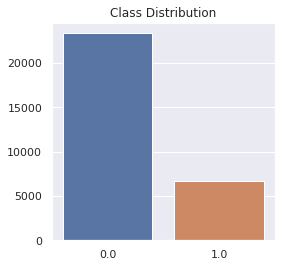

Value Distribution:
[23364  6636]


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#function to display barplot of a given categorical feature and print it's value distribution
def plot_barplot(feature):
  count_values = feature.value_counts()
  sns.barplot(count_values.index, count_values.values)
  plt.title("Class Distribution")
  plt.show()
  print("Value Distribution:")
  print(count_values)

index,counts = np.unique(data['DEFAULT'], return_counts=True) #
sns.set(rc={'figure.figsize':(4.0,4.0)})
sns.barplot(index, counts)
plt.title("Class Distribution")
plt.show()
print("Value Distribution:")
print(counts)


In [25]:
data[categ_cols].describe()

,SEX,MARRIAGE,EDUCATION,DEFAULT,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
unique,2.0,4.0,7.0,2.0,11.0,11.0,11.0,11.0,10.0,10.0
top,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,18112.0,15964.0,14030.0,23364.0,14737.0,15730.0,15764.0,16455.0,16947.0,16286.0


There are seven unique cateogries for the education feature, but only 4 of them are **known** `(1,2,3,4)`.

Therefore, we will bin together the values of `0, 5, 6` under one category called **unknown**. 

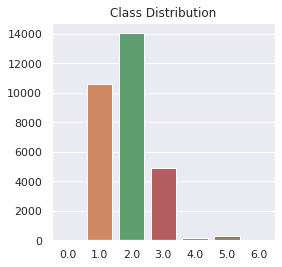

Value Distribution:
2.0    14030
1.0    10585
3.0     4917
5.0      280
4.0      123
6.0       51
0.0       14
Name: EDUCATION, dtype: int64


In [26]:
plot_barplot(data['EDUCATION'])

### Numerical Statistics

In [27]:
data.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers we will be using Extra Tree Classifier for extracting the ranking the features in the dataset.

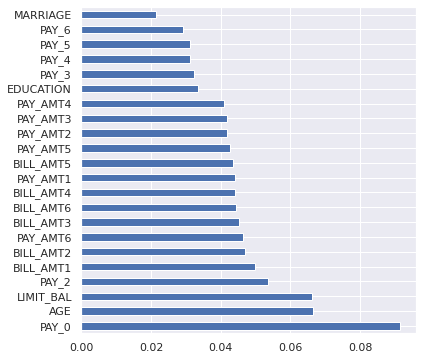

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

features = (data.iloc[:, 1:-1]).reset_index(drop=True)
features = features.astype('int64')
y = data.iloc[:,-1].astype('int8')

#use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(features,y)
feature_importances = model.feature_importances_
#print(feature_importances) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_importances, index=features.columns)
plt.figure(figsize=(6,6))
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap


Correlation states how the features are related to each other or the target variable.

**Positive Correlation** - Increase in one value of feature increases the value of the target variable.

**Negative Correlation** - increase in one value of feature decreases the value of the target variable.

Heatmap helps to identify which features are most related to the target variable.

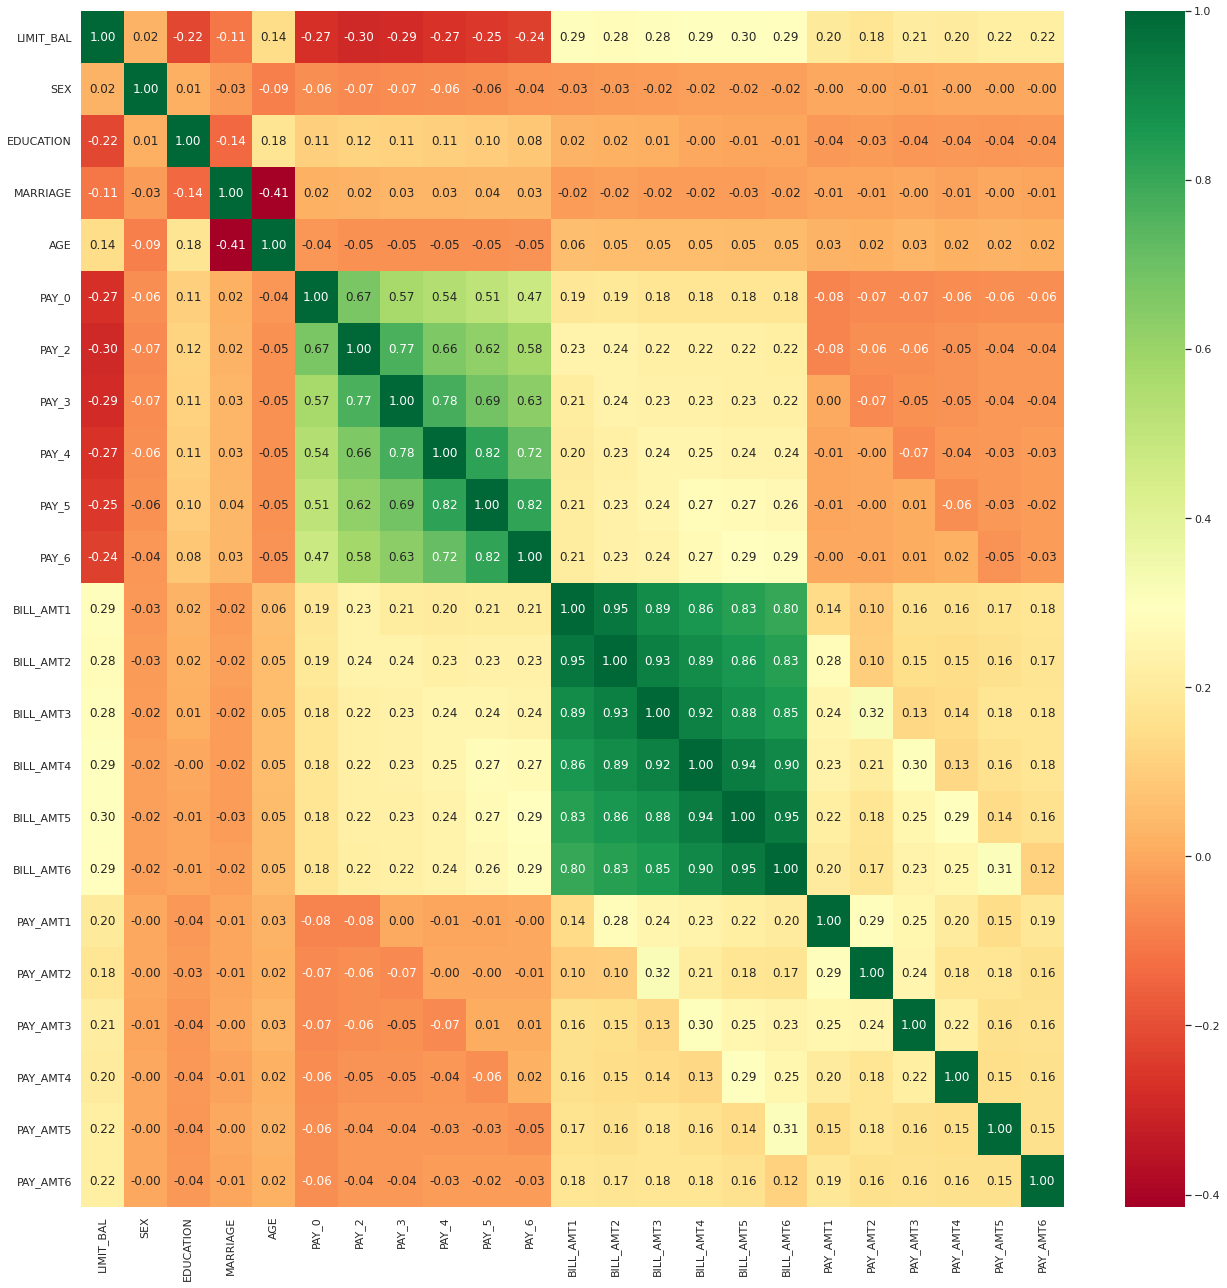

In [29]:
### Correlation Matrix with Heatmap

features = data[features.columns]
features= features.astype('int64')
corrmat = features.corr()


#plot heat map
plt.figure(figsize=(22,22))
g=sns.heatmap(corrmat, 
              #norm=divnorm, 
              annot=True,
              cmap="RdYlGn",
              #center=0,
              fmt ='.2f')

### Bivariate Analysis

Text(0.5, 1.0, 'Density Plot of Limit Balance per Default Type\n')

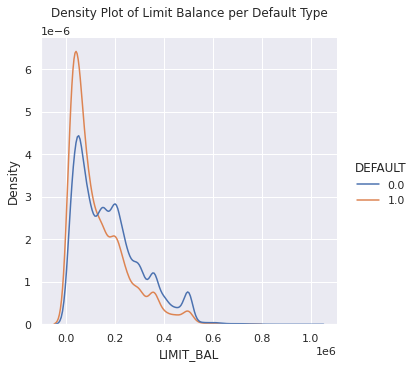

In [30]:
sns.displot(data = data,  x = 'LIMIT_BAL', kind="kde", label='Default Type', hue='DEFAULT',  common_norm=False)
plt.title("Density Plot of Limit Balance per Default Type\n")

Text(0.5, 1.0, 'Density Plot of Age per Default Type\n')

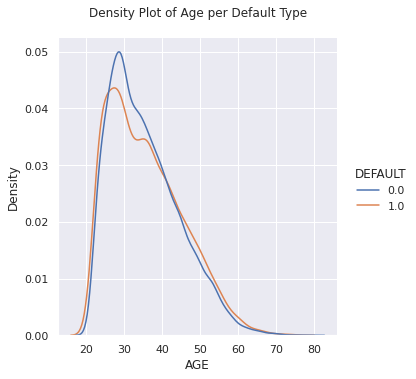

In [31]:
sns.displot(data = data,  x = 'AGE', kind="kde", label='Default Type', hue='DEFAULT',  common_norm=False)
plt.title("Density Plot of Age per Default Type\n")

Text(0.5, 1.0, 'Density Plot of PAY_0 per Default Type\n')

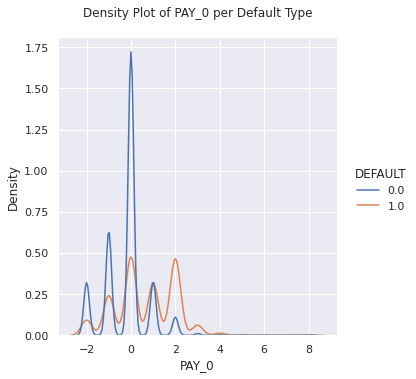

In [32]:
data_tmp = data
data_tmp['PAY_0'] = data['PAY_0'].astype('int')

sns.displot(data = data_tmp,  x = 'PAY_0', kind="kde", label='Default Type', hue='DEFAULT',  common_norm=False)
plt.title("Density Plot of PAY_0 per Default Type\n")

Text(0.5, 1.0, 'Density Plot of BIL_AMT1 per Default Type\n')

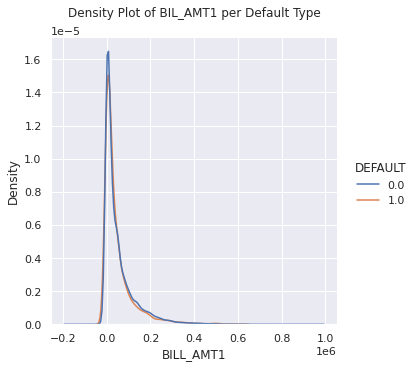

In [33]:
sns.displot(data = data_tmp,  x = 'BILL_AMT1', kind="kde", label='Default Type', hue='DEFAULT',  common_norm=False)
plt.title("Density Plot of BIL_AMT1 per Default Type\n")

# Data Preparation

## Standarizing and Feature Selection

In [34]:
#drop first feature
data = data.drop(['ID'], axis='columns') 
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,20000.0,2.0,2.0,1.0,24,2,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26,-1,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34,0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37,0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57,-1,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000.0,1.0,1.0,2.0,37,0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000.0,1.0,1.0,2.0,29,0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000.0,2.0,2.0,2.0,23,0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000.0,2.0,3.0,1.0,28,0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,20000.0,1.0,3.0,2.0,35,-2,-2.0,-2.0,-2.0,-1.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


## Binning unkwown values for Education feature

Text(0.5, 1.0, 'Stacked Histogram of Education per Default Type\n')

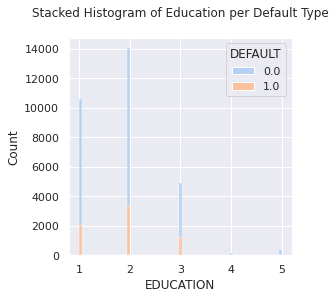

In [48]:
education_feature = data['EDUCATION']
data['EDUCATION'] = education_feature.replace(to_replace=[0.0, 5.0, 6.0], value=5.0)

#data2 = data.copy()
#data2['EDUCATION'] = data2['EDUCATION'].astype("int16")
sns.histplot(data = data2, x='EDUCATION', label='Default Type', hue='DEFAULT',  stat='count', multiple='stack', palette='pastel')
plt.title("Stacked Histogram of Education per Default Type\n")

In [49]:
data.isnull().sum(axis=0)

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

**Writing the data to a comma-separated values (csv) file.**

In [ ]:
data.to_csv('default_processed.csv', index=False)